# Thermal Imaging-based Physiological and Affective computing (TIPA)
## TIPA Opensource project 

Created: August 2019 (very initial stage) <br>
Author(s): Dr. Youngjun Cho (Assistant Professor, Department of Computer Science, University College London, UCL) <br>

This project is to support the <a href="http://acii-conf.org/wp-content/uploads/2019/08/ACII2019_tutorial_programme-EDIT.pdf">ACII 2019</a>'s tutorial on Thermal Imaging-based Physiological and Affective computing <br>
<br>

Full source code: https://github.com/deepneuroscience/TIPA <br>
Example dataset: <a href="https://drive.google.com/open?id=1hn3VjwILNiJ0-nNKwR80Sb6zV3Vil26w">Link</a> <br>
Temporary TIPA opensource project website: http://youngjun.cho/TIPA<br>




## Key Reference

[1] Youngjun Cho and Nadia Bianchi-Berthouze. 2019. Physiological and Affective Computing through Thermal Imaging: A Survey. arXiv:1908.10307 [cs], http://arxiv.org/abs/1908.10307

### Further Technical References
[2] Cho, Y., Julier, S.J., Marquardt, N. and Bianchi-Berthouze, N., 2017. Robust tracking of respiratory rate in high-dynamic range scenes using mobile thermal imaging. Biomedical optics express, 8(10), pp.4480-4503. https://doi.org/10.1364/BOE.8.004480

[3] Cho, Y., Julier, S.J. and Bianchi-Berthouze, N., 2019. Instant Stress: Detection of Perceived Mental Stress Through Smartphone Photoplethysmography and Thermal Imaging. JMIR mental health, 6(4), p.e10140. https://doi.org/10.2196/10140

[4] Cho, Y., Bianchi-Berthouze, N. and Julier, S.J., 2017. DeepBreath: Deep learning of breathing patterns for automatic stress recognition using low-cost thermal imaging in unconstrained settings. In 2017 Seventh International Conference on Affective Computing and Intelligent Interaction (ACII) (pp. 456-463). IEEE. https://doi.org/10.1109/ACII.2017.8273639

[5] Cho, Y., Bianchi-Berthouze, N., Marquardt, N. and Julier, S.J., 2018. Deep Thermal Imaging: Proximate Material Type Recognition in the Wild through Deep Learning of Spatial Surface Temperature Patterns. In Proceedings of the 2018 CHI Conference on Human Factors in Computing Systems, ACM. https://doi.org/10.1145/3173574.3173576

Let's start!

## Basic tutorial

### 1. Import TIPA libraries

In [1]:
import sys
from platform import python_version
# sys.path.insert(0,'./TIPA_library/')

from TIPA_library.main.data_preparation import *
from TIPA_library.main.thermal_image_processing import *
from TIPA_library.utils import timshow as tim
from TIPA_library.utils import rvs


### 2. Loading a raw sequence of thermal 2d matrices
The TIPA project mainly uses the TIPA frame protocol below by default.

For FLIR ONE (SDK) users,
you can simply implement the code from the link below.
https://github.com/deepneuroscience/DeepThermalImaging/tree/master/example%20code%20for%20FLIR%20One%20sdk


<img src="https://github.com/deepneuroscience/TIPA/blob/master/figures/figure1.png?raw=true">
        Figure 1. TIPA (Thermal Imaging-based Physiological and Affective computing) Project Dataframe protocol

#### Example Dataset
We provide example data. <br><br>
Download this dataset - <a href="https://drive.google.com/open?id=1hn3VjwILNiJ0-nNKwR80Sb6zV3Vil26w">Link</a> <br>
Unzip, move them to a directory (./data) <br>
./data/example_data.dat<br>
./data/example_data_in_front_of_building.dat<br>

In [28]:
# The matrix size has to be known in advance. e.g.320 x 240
# data = data_preparation_TIPA_protocol('./data/example_data.dat',320,240)
data = data_preparation_TIPA_protocol('./data/example_data_in_front_of_building.dat',320,240)
# print(data.time_stamp)


In [36]:
import cv2
from flirpy.camera.lepton import Lepton
# sometimes camera isnt properly connected even when its light is on.
# disconnect usb cable from computer and rec
with Lepton() as camera:
    while True:
        img = camera.grab().astype(np.float32)

        # Rescale to 8 bit
        img = 255*(img - img.min())/(img.max()-img.min())

        # Apply colourmap - try COLORMAP_JET if INFERNO doesn't work.
        # You can also try PLASMA or MAGMA
        img_col = cv2.applyColorMap(img.astype(np.uint8), cv2.COLORMAP_INFERNO)

        cv2.imshow('Lepton', img_col)
        if cv2.waitKey(1) == 27:
            break  # esc to quit

cv2.destroyAllWindows()

In [138]:
# capture single image. 

import numpy
matrix = None
with Lepton() as camera:
    r_image = camera.grab()
    r_image = (image - 27315) / 100
    
    matrix = numpy.expand_dims(r_image, -1)# make it processable by TIPA
print(matrix.shape)
#data = data_preparation_raw_matrix(matrix,25)

(120, 160, 1)


In [15]:
# capture 30 images in a row 

import numpy
from flirpy.camera.lepton import Lepton
import cv2
matrix = None
with Lepton() as camera:
    r_image = camera.grab()
    r_image = (r_image - 27315) / 100
    
    matrix = numpy.expand_dims(r_image, -1)# make it processable by TIPA

    for i in range(1,30):
        print(i)
        r_image = camera.grab()
        r_image = (r_image - 27315) / 100
        r_image = numpy.expand_dims(r_image, -1)
        
        matrix = numpy.append(matrix, r_image, axis = -1)
        
print(matrix.shape)
#data = data_preparation_raw_matrix(matrix,25)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
(120, 160, 30)


For the ones using other thermal cameras,<br>
simply load raw thermal matrices with your known framerate<br>
(you may need to convert the ascii format, e.g. *.asc to a matrix.) <br>
contact youngjun[dot]cho[at]ucl.ac.uk for any quiries


In [23]:
# save data to file
np.save('test.npy', matrix)

In [24]:
# rad data from file
matrix = np.load('test.npy')
print(loaded_matrix.shape)

(120, 160, 30)


In [16]:
#data = data_preparation_raw_matrix(matrix, framerate)
print(matrix.shape)
data = data_preparation_raw_matrix(matrix,25)

(120, 160, 30)


### 3. Manual Inspection of the loaded thermal matrices
<br>

#### Tool 1: interactive_thermal_matrix_view <br>
simply, you can examine temperatures on your thermal image with your cursor.



<IPython.core.display.Javascript object>


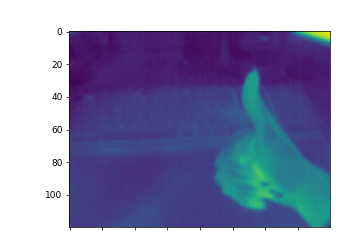

In [25]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib notebook
def update(fig):
    fig.canvas.draw()
    
def interactive_thermal_matrix_view(matrix):
    
    fig= plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.imshow(matrix)
    
    interact(update(fig))
    


frame_number = 8

interactive_thermal_matrix_view(data.thermal_matrix[:,:,frame_number])
#interactive_thermal_matrix_view(image)

#### Tool 2: Interactive ImShow Cond1 for multiple frames <br>
simply, you can change the value on the slider (frame_num). e.g. frame number = 100


In [26]:
from ipywidgets import interactive, FloatRangeSlider, Output, VBox
%matplotlib inline

interactive_plot = interactive(data.interactive_imshow_cond,  frame_number=(0, data.thermal_matrix.shape[2]-1))
output = interactive_plot.children[-1]
output.layout.height = '320px'
interactive_plot
#VBox([range_slider,interactive_plot])

interactive(children=(IntSlider(value=14, description='frame_number', max=29), Output(layout=Layout(height='32…

#### Tool 3: Interactive ImShow Cond2 for multiple frames with a function to select your thermal range of interest <br>
in short, you can change the value on the slider (frame_num). e.g. frame number = 100 <br>
and you can adjust the thermal (temperature) range of interest <br>

In [21]:
from ipywidgets import interactive, FloatRangeSlider, Output, VBox, Layout
%matplotlib inline

# layout = Layout(width='500px')
range_slider = widgets.FloatRangeSlider(
    value=[0, +50],
    min=0., max=+60., step=0.1,
    description='thermal range of interest',
    readout_format='.1f',
#     layout=layout
)
# range_slider

interactive_plot = interactive(data.interactive_imshow_cond2,  frame_number=(0, data.thermal_matrix.shape[2]-1), thermal_range=range_slider)
output = interactive_plot.children[-1]
output.layout.height = '320px'
interactive_plot
# VBox([range_slider,interactive_plot])


interactive(children=(IntSlider(value=14, description='frame_number', max=29), FloatRangeSlider(value=(0.0, 50…

#### Tool 4: Interactive ImShow Cond 3
##### for multiple frames with the optimal quantization to automatically select your thermal range of interest <br>
in short, you can change the value on the slider (frame_num). e.g. frame number = 100 <br>
and this will automatically select your thermal (temperature) range of interest <br>
We will come back here again on the preprocessing section 
###### [Key reference]<br>
Cho, Y., Julier, S.J., Marquardt, N. and Bianchi-Berthouze, N., 2017. Robust tracking of respiratory rate in high-dynamic range scenes using mobile thermal imaging. Biomedical optics express, 8(10), pp.4480-4503. https://doi.org/10.1364/BOE.8.004480

In [22]:
from ipywidgets import interactive, FloatRangeSlider, Output, VBox, Layout
%matplotlib inline


interactive_plot = interactive(data.interactive_imshow_cond3,  frame_number=(0, data.thermal_matrix.shape[2]-1))
output = interactive_plot.children[-1]
output.layout.height = '320px'
interactive_plot
VBox([range_slider,interactive_plot])


### 4. Computational Pipeline
Here, we focus on the case where an automatic ROI tracking method is used.
For the ROI selection,
a ROI can be chosen either manually or automatically. (here we select it manually)

<img src="https://github.com/deepneuroscience/TIPA/blob/master/figures/figure2.png?raw=true"> <br>
Figure 2. Computational pipeline that has been commonly applied to studies on thermal imaging-based physiological computing: this consists of three main steps, the ROI selection, automatic ROI tracking and spatial interpretation. a) with automatic ROI tracking, b) without automatic ROI tracking (in this case a head fixation mount is used)<br>
<br>
[Reference]
Youngjun Cho and Nadia Bianchi-Berthouze. 2019. Physiological and Affective Computing through Thermal Imaging: A Survey. arXiv:1908.10307 [cs], http://arxiv.org/abs/1908.10307

<br>



### 4.1. Preprocessing (Quantization)

#### [Two standard methods]
A) Non-optimal (linear) quantization <br>
Mapping temperatures to thermal images with a selected temperature range of interest, which is traditionally fixed from the first thermogram frame (e.g. 30°C to 40°C) <br>
<br>
B) Optimal quantization<br>
Mapping temperatures to thermal images adaptively against environmental temperature effects.<br>
<br>
Go back to Section 3 and compare Tool C with Tool D (optimal quantization is applied) <br>
<br>

###### [Key reference]
Cho, Y., Julier, S.J., Marquardt, N. and Bianchi-Berthouze, N., 2017. Robust tracking of respiratory rate in high-dynamic range scenes using mobile thermal imaging. Biomedical optics express, 8(10), pp.4480-4503. https://doi.org/10.1364/BOE.8.004480

<img src="https://github.com/deepneuroscience/TIPA/blob/master/figures/figure3.png?raw=true"> <br>
Figure 3. High thermal dynamic range scenes: fixed thermal range of interest is not suitable in preserving the morphological facial shape within varying ambient temperature: [top] examples of thermogram shots collected from a person walking outdoor (for 6 minutes), [bottom] temperature histograms<br>
<br>

#### 4.1.1. Non-optimal (linear) quantization

your fixed thermal range of interest is [30.000000, 40.000000]


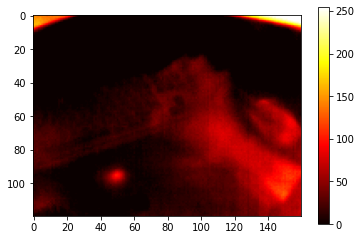

In [10]:
frame_number = 1

temp_mat = copy.deepcopy(data.thermal_matrix[:,:,frame_number])   ## Object should be deep copied. not mat = data.thermal_matrix
output = nonoptimal_quantization(temp_mat, 30, 40, True)

%matplotlib inline
tim.timshow(output)


#### 4.1.2. Optimal quantization

optimal thermal range is [30.877994, 33.840000]


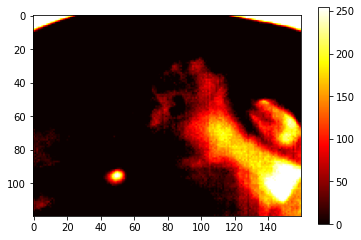

In [11]:
frame_number = 1
temp_mat = copy.deepcopy(data.thermal_matrix[:,:,frame_number])   ## Object should be deep copied. not mat = data.thermal_matrix
output = optimal_quantization(temp_mat, True)

%matplotlib inline
tim.timshow(output)

### 4.2. Automatic ROI Tracking 
#### This consists of 1) ROI selection, 2) Quantization, 3) ROI Tracking
Note: advanced trackers need to be implemented
here we are only using widely used motion tracking methods such as Median Flow, TLD etc.

In [15]:
print('1. Select your ROI and press Enter')
print('2. Press ESC to exit')

start_frame_number=1900
thermal_matrix=data.thermal_matrix[:,:,start_frame_number:-1]

ROI_seq, t_video =thermal_tracker(thermal_matrix, 'optimal', 'MEDIANFLOW', False, False)
# ROI_seq, t_video =thermal_tracker(thermal_matrix, 'optimal', 'TLD', False, False)
# ROI_seq, t_video =thermal_tracker(thermal_matrix, 'non-optimal', 'MEDIANFLOW', False, False, True, 0, 30)     
# ROI_seq, t_video =thermal_tracker(thermal_matrix) 
data.tracked_matrix=t_video

1. Select your ROI and press Enter
2. Press ESC to exit


AttributeError: module 'cv2.cv2' has no attribute 'TrackerMedianFlow_create'

In [16]:
from ipywidgets import interactive, FloatRangeSlider, Output, VBox
%matplotlib inline

interactive_plot = interactive(data.interactive_imshow_cond4,  frame_number=(0, thermal_matrix.shape[2]-1))
output = interactive_plot.children[-1]
output.layout.height = '320px'
interactive_plot
# VBox([range_slider,interactive_plot])

interactive(children=(IntSlider(value=151, description='frame_number', max=303), Output(layout=Layout(height='…

<Figure size 432x288 with 0 Axes>


### 4.3. Spatial Interpretation

Here, we use a classical method only - averaging. <br>

In [12]:
# print(ROI_seq)
ft_vector = np.zeros((5,thermal_matrix.shape[2]))
for i in range(thermal_matrix.shape[2]) :
    ft_vector[1,i]= np.mean(thermal_matrix[int(ROI_seq[0,i]):int(ROI_seq[0,i]+ROI_seq[2,i]) ,int(ROI_seq[1,i]):int(ROI_seq[1,i]+ROI_seq[3,i]),i])

    

NameError: name 'thermal_matrix' is not defined

##### Plot the extracted signals

Now you have to prgramm your codes by yourself to refine your signals (e.g. bandpass filtering, frequency analysis, etc) <br>

In [13]:

from ipywidgets import interactive, FloatRangeSlider, Output, VBox, Layout, fixed
%matplotlib inline
start_frame_number=6

layout = Layout(width='500px')
range_slider = widgets.FloatRangeSlider(
    value=[data.time_stamp[start_frame_number],data.time_stamp[-1]],
    min=data.time_stamp[start_frame_number], max= data.time_stamp[-1], step=1,
    description='range',
    readout_format='.1f',
    layout=layout
)
# range_slider

def interactive_timeplot(time, signal, fig_w, range_bar):
    fig = plt.gcf()
    yourDPI = fig.get_dpi()

#     plt.figure(figsize=(fig_w/yourDPI,(fig_w/yourDPI)/3))
    plt.plot(time, signal)
    plt.axis([range_bar[0], range_bar[1],min(signal), max(signal)])
#     plt.axis([time[int(range_bar[0])], time[int(range_bar[1])],min(signal[int(range_bar[0]):int(range_bar[1])]), max(signal[int(range_bar[0]):int(range_bar[1])])])
#                          min(signal[range_bar[0]:range_bar[1]]), max(signal[range_bar[0]:range_bar[1]])]
#     plt.show()
    
m_interactive_timeplot = interactive(interactive_timeplot, time= fixed(data.time_stamp[start_frame_number:-1]), signal=fixed(ft_vector[1,:]), fig_w=fixed(500), range_bar=range_slider)
m_interactive_timeplot

NameError: name 'ft_vector' is not defined

close your extra opencv window

In [19]:
cv2.destroyAllWindows()

Note: currently working on codes for the spectrogram analysis
TIPA_library.utils: overlap_windows, overlap_matrix, gausswin, compute_frequency_grid, rvs
if your targeted signature is about respiratory or cardiac pulse, then you could use this code (respiration variability spectrogram) later
<br>
A key reference for this:
Cho, Y., Bianchi-Berthouze, N. and Julier, S.J., 2017. DeepBreath: Deep learning of breathing patterns for automatic stress recognition using low-cost thermal imaging in unconstrained settings. In 2017 Seventh International Conference on Affective Computing and Intelligent Interaction (ACII) (pp. 456-463). IEEE. https://doi.org/10.1109/ACII.2017.8273639 <br>

<br>
you need to use your own data as the given samples are with non-fixed sampling rates.<br>
rvs_output= rvs.rvs(8, ft_vector) (incomplete)


<br>
### Lastly, we warmly welcome potential contributors!